##### Task-1 Load the dataset

In [2]:
# Make project src importable in this notebook
import sys, os
src_path = os.path.abspath('../src')
if src_path not in sys.path:
    sys.path.append(src_path)

In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import re
import os
# Load dataset
df = pd.read_csv('../data/complaints.csv')

# Display basic info
print("Dataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

# Display column names
print("\nColumns:", df.columns.tolist())

C:\Users\Getachew Ganfur\AppData\Local\Temp\ipykernel_8392\3854504783.py:8: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/complaints.csv')


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9609797 entries, 0 to 9609796
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memo

##### Initial EDA

In [4]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Date received                         0
Product                               0
Sub-product                      235295
Issue                                 6
Sub-issue                        839522
Consumer complaint narrative    6629041
Company public response         4770207
Company                               0
State                             54516
ZIP code                          30228
Tags                            8981029
Consumer consent provided?      1649561
Submitted via                         0
Date sent to company                  0
Company response to consumer         20
Timely response?                      0
Consumer disputed?              8841498
Complaint ID                          0
dtype: int64


In [5]:
print("\nUnique Products:")
print(df['Product'].value_counts())


Unique Products:
Product
Credit reporting or other personal consumer reports                             4834855
Credit reporting, credit repair services, or other personal consumer reports    2163857
Debt collection                                                                  799197
Mortgage                                                                         422254
Checking or savings account                                                      291178
Credit card                                                                      226686
Credit card or prepaid card                                                      206369
Money transfer, virtual currency, or money service                               145066
Credit reporting                                                                 140429
Student loan                                                                     109717
Bank account or service                                                           86205
Vehicl

##### Analyze Distribution of Complaints Across Products

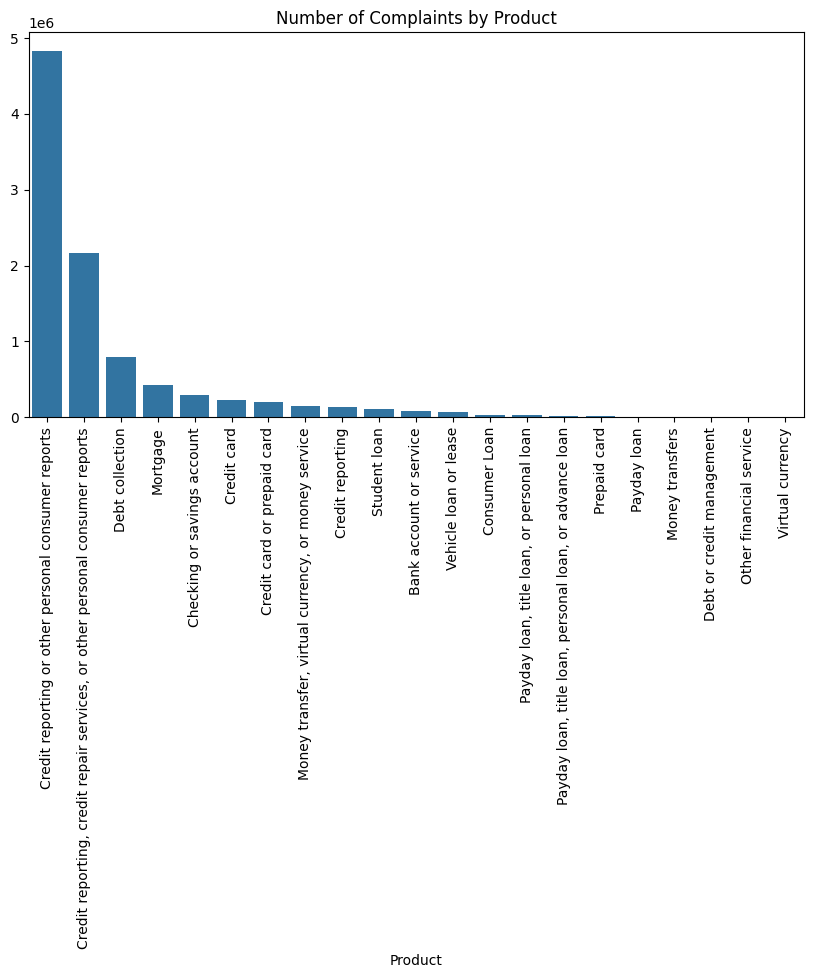

In [6]:
# Distribution of complaints by product
import matplotlib.pyplot as plt
product_counts = df['Product'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=product_counts.index, y=product_counts.values)
plt.title("Number of Complaints by Product")
plt.xticks(rotation=90)
plt.show()

##### Identify complaints with/without narratives

In [7]:
print("\nComplaints with Narratives:")
print(f"Total Complaints: {len(df)}")
print(f"With Narrative: {df['Consumer complaint narrative'].notnull().sum()}")
print(f"Without Narrative: {df['Consumer complaint narrative'].isnull().sum()}")


Complaints with Narratives:
Total Complaints: 9609797
With Narrative: 2980756
Without Narrative: 6629041


##### Calculating word count


Narrative Length Statistics:
count    2.980756e+06
mean     1.755976e+02
std      2.259282e+02
min      1.000000e+00
25%      5.900000e+01
50%      1.140000e+02
75%      2.090000e+02
max      6.469000e+03
Name: narrative_length, dtype: float64


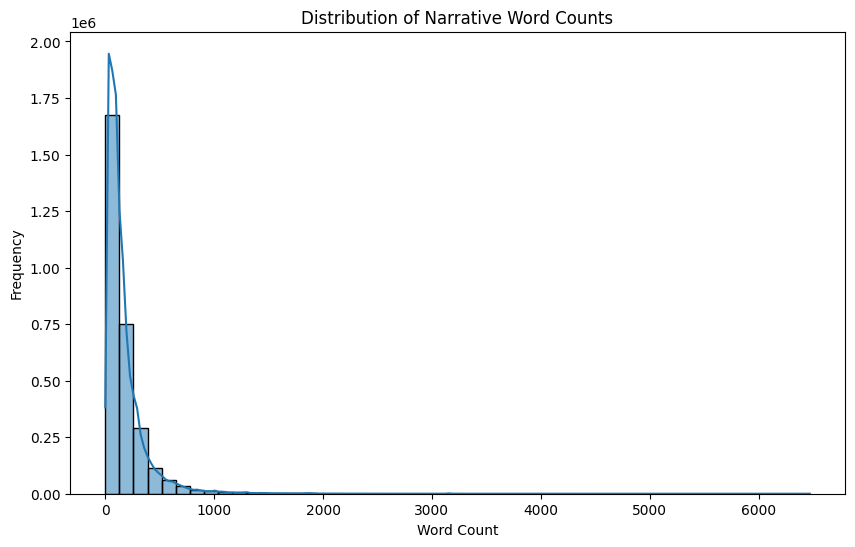

In [8]:
# Calculate word count
df['narrative_length'] = df['Consumer complaint narrative'].dropna().apply(lambda x: len(str(x).split()))

# Summary statistics
print("\nNarrative Length Statistics:")
print(df['narrative_length'].describe())

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['narrative_length'].dropna(), bins=50, kde=True)
plt.title('Distribution of Narrative Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.savefig('../reports/narrative_length_histogram.png')
plt.show()

##### Identify complaints with/without narratives

In [9]:
print("\nComplaints with Narratives:")
print(f"Total Complaints: {len(df)}")
print(f"With Narrative: {df['Consumer complaint narrative'].notnull().sum()}")
print(f"Without Narrative: {df['Consumer complaint narrative'].isnull().sum()}")


Complaints with Narratives:
Total Complaints: 9609797
With Narrative: 2980756
Without Narrative: 6629041


In [11]:
#PRINT THE UNIQUE PRODUCTS
print("Unique Products:")  
print(df['Product'].unique())
# Filter product categories
valid_products = [
    "Credit card", 
    "personal loan", 
    "Buy Now, Pay Later", 
    "savings account", 
    "Money transfers"
]

filtered_df = df[df['Product'].isin(valid_products)]
filtered_df = filtered_df[filtered_df['Consumer complaint narrative'].notnull()].copy()
filtered_df.shape

Unique Products:
['Credit reporting or other personal consumer reports' 'Debt collection'
 'Credit card' 'Checking or savings account'
 'Money transfer, virtual currency, or money service'
 'Vehicle loan or lease' 'Debt or credit management' 'Mortgage'
 'Payday loan, title loan, personal loan, or advance loan' 'Prepaid card'
 'Student loan' 'Credit reporting'
 'Credit reporting, credit repair services, or other personal consumer reports'
 'Credit card or prepaid card' 'Payday loan, title loan, or personal loan'
 'Bank account or service' 'Money transfers' 'Consumer Loan' 'Payday loan'
 'Other financial service' 'Virtual currency']


(82164, 19)

##### Load Preprocessed Data

In [12]:
# Save cleaned dataset
import os
output_path = "../data/filtered_complaints.csv"
os.makedirs("../data", exist_ok=True)
filtered_df.to_csv(output_path, index=False)
print(f"Cleaned dataset saved to {output_path}")

Cleaned dataset saved to ../data/filtered_complaints.csv


### Filter Dataset

##### Clean Text Narratives

In [14]:
import re
import nltk
from nltk.tokenize import word_tokenize

def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    # Remove boilerplate 
    boilerplate = ['i am writing to file a complaint', 'please assist']
    for phrase in boilerplate:
        text = text.replace(phrase, '')
    return text

# Apply cleaning
df_filtered['cleaned_narrative'] = df_filtered['Consumer complaint narrative'].apply(clean_text)

# Verify cleaning
print("\nSample Cleaned Narratives:")
print(df_filtered[['Consumer complaint narrative', 'cleaned_narrative']].head())


Sample Cleaned Narratives:
                            Consumer complaint narrative  \
12237  A XXXX XXXX card was opened under my name by a...   
12532  I made the mistake of using my wellsfargo debi...   
13280  Dear CFPB, I have a secured credit card with c...   
13506  I have a Citi rewards cards. The credit balanc...   
13955  b'I am writing to dispute the following charge...   

                                       cleaned_narrative  
12237  a xxxx xxxx card was opened under my name by a...  
12532  i made the mistake of using my wellsfargo debi...  
13280  dear cfpb i have a secured credit card with ci...  
13506  i have a citi rewards cards the credit balance...  
13955  bi am writing to dispute the following charges...  


C:\Users\Getachew Ganfur\AppData\Local\Temp\ipykernel_8392\2401061912.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['cleaned_narrative'] = df_filtered['Consumer complaint narrative'].apply(clean_text)
